In [47]:
import os

In [48]:
import pickle

In [49]:
from typing import Dict

In [50]:
from ast import literal_eval

In [51]:
import seaborn as sns

In [52]:
import matplotlib.pyplot as plt

In [53]:
%matplotlib inline

In [54]:
from tqdm import tqdm, trange

In [55]:
import pandas as pd

In [56]:
import numpy as np

In [57]:
import torch

In [58]:
from torch.optim import AdamW

In [59]:
from torch.nn import BCEWithLogitsLoss, BCELoss

In [60]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

In [61]:
from transformers import XLNetForSequenceClassification, XLNetTokenizer,BertForSequenceClassification,BertTokenizer, RobertaForSequenceClassification,RobertaTokenizer

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
from sklearn.preprocessing import MultiLabelBinarizer

In [64]:
from sklearn.metrics import classification_report, confusion_matrix, multilabel_confusion_matrix, f1_score, accuracy_score

In [65]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [66]:
torch.__version__

'1.13.1+cpu'

In [67]:
device = "cpu"

In [68]:
dataset_Name='Dataset/PubMed-Dataset.csv'

In [69]:
df= pd.read_csv(dataset_Name, nrows=2000)

In [70]:
df.head()

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
0,Expression of p53 and coexistence of HPV in pr...,Fifty-four paraffin embedded tissue sections f...,"['DNA Probes, HPV', 'DNA, Viral', 'Female', 'H...",8549602,"[['D13.444.600.223.555', 'D27.505.259.750.600....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,1,1,1,0,0,1,0,0,0,0,0,0
1,Vitamin D status in pregnant Indian women acro...,The present cross-sectional study was conducte...,"['Adult', 'Alkaline Phosphatase', 'Breast Feed...",21736816,"[['M01.060.116'], ['D08.811.277.352.650.035'],...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,1,1,0,1,1,0,1,1,1
2,[Identification of a functionally important di...,The occurrence of individual amino acids and d...,"['Amino Acid Sequence', 'Analgesics, Opioid', ...",19060934,"[['G02.111.570.060', 'L01.453.245.667.060'], [...","['Phenomena and Processes [G]', 'Information S...",1,1,0,1,1,0,1,0,0,0,1,0,0,0
3,Multilayer capsules: a promising microencapsul...,"In 1980, Lim and Sun introduced a microcapsule...","['Acrylic Resins', 'Alginates', 'Animals', 'Bi...",11426874,"[['D05.750.716.822.111', 'D25.720.716.822.111'...","['Chemicals and Drugs [D]', 'Technology, Indus...",1,1,1,1,1,0,1,0,0,1,0,0,0,0
4,"Nanohydrogel with N,N'-bis(acryloyl)cystine cr...",Substantially improved hydrogel particles base...,"['Antineoplastic Agents', 'Cell Proliferation'...",28323099,"[['D27.505.954.248'], ['G04.161.750', 'G07.345...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",1,1,0,1,1,0,1,0,0,1,0,0,0,0


In [71]:
df.sample(10)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,E,F,G,H,I,J,L,M,N,Z
1094,Expression profiling defines a recurrence sign...,Lung cancer remains the leading cause of cance...,"['Aged', 'Carcinoma, Squamous Cell', 'Female',...",17082175,"[['M01.060.116.100'], ['C04.557.470.200.400', ...","['Named Groups [M]', 'Diseases [C]', 'Analytic...",0,1,1,0,1,0,0,0,0,0,0,1,1,0
736,Simple model to explain effects of plasma prot...,"A simple pharmacokinetic model, incorporating ...","['Blood Proteins', 'Kinetics', 'Mathematics', ...",1001358,"[['D12.776.124'], ['G01.374.661', 'G02.111.490...","['Chemicals and Drugs [D]', 'Phenomena and Pro...",0,0,0,1,1,0,1,1,0,0,0,0,0,0
1509,"Psychopathology, temperament, and past course ...",We report on the utility of a new instrument t...,"['Adult', 'Bipolar Disorder', 'Cyclothymic Dis...",2602525,"[['M01.060.116'], ['F03.084.500'], ['F03.600.5...","['Named Groups [M]', 'Psychiatry and Psycholog...",0,1,1,0,0,1,0,0,0,0,1,1,0,0
496,Ovulation induction with low-dose follicle-sti...,Fifty infertile women with the polycystic ovar...,"['Adult', 'Female', 'Follicle Stimulating Horm...",8382432,"[['M01.060.116'], ['D06.472.699.322.576.288', ...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,1,0,1,0,0,0,0,1,1,0
1082,Autoimmune and lymphoproliferative disease in ...,"G(IX) congeneic mouse strains, C57BL/6-G(IX) (...","['Animals', 'Antibodies', 'Antibody Formation'...",228283,[],[],0,0,0,0,0,0,0,0,0,0,0,0,0,0
1621,Elevation of c-abl-mRNA in human leukemic B ly...,Analysis of v-abl-homologous transcripts in pe...,"['B-Lymphocytes', 'Base Sequence', 'Humans', '...",3491935,"[['A11.063.438', 'A11.118.637.555.567.562', 'A...","['Anatomy [A]', 'Phenomena and Processes [G]',...",1,1,1,1,1,0,1,0,0,0,1,0,0,0
1995,Models of tibial fracture healing in normal an...,Delayed union and nonunion are common complica...,"['Animals', 'Bone Density', 'Bony Callus', 'Ca...",18383150,"[['B01.050'], ['G11.427.100'], ['A10.165.265.2...","['Organisms [B]', 'Phenomena and Processes [G]...",1,1,1,1,1,0,1,0,0,0,0,0,0,0
137,Genomic and transcriptome analysis of triclosa...,"During the last decade, an increasing amount o...","['Acinetobacter baumannii', 'Anti-Bacterial Ag...",27665456,"[['B03.440.400.425.537.050.099', 'B03.660.250....","['Organisms [B]', 'Chemicals and Drugs [D]', '...",0,1,0,1,1,0,1,1,0,0,0,0,0,0
1637,Synchronous carcinomas of cervix and ovary: ca...,Four cases of synchronous carcinoma of the cer...,"['Adenocarcinoma', 'Adult', 'Female', 'Humans'...",7653409,"[['C04.557.470.200.025'], ['M01.060.116'], ['B...","['Diseases [C]', 'Named Groups [M]', 'Organism...",0,1,1,0,0,0,0,0,0,0,0,1,0,0
1206,Covalent modification of nitrogenase MoFe prot...,MgADP- reacted with the nitrogenase molybdenum...,"['Adenosine Diphosphate', 'Klebsiella pneumoni...",9148743,"[['D03.633.100.759.646.138.124', 'D13.695.667....","['Chemicals and Drugs [D]', 'Organisms [B]', '...",0,1,0,1,1,0,1,0,0,0,0,0,0,0


In [72]:
df.isna().sum()

Title           0
abstractText    0
meshMajor       0
pmid            0
meshid          0
meshroot        0
A               0
B               0
C               0
D               0
E               0
F               0
G               0
H               0
I               0
J               0
L               0
M               0
N               0
Z               0
dtype: int64

In [73]:
df.duplicated().sum()

1

In [74]:
print("Total number of Articles extracted from Bioasq dataset are =",len(df))

Total number of Articles extracted from Bioasq dataset are = 2000


In [75]:
print('Average Article length: ', df.abstractText.str.split().str.len().mean())

Average Article length:  190.584


In [76]:
print('Stdev Article length: ', df.abstractText.str.split().str.len().std())

Stdev Article length:  76.006370971216


In [77]:
cols = df.columns

In [78]:
cols = list(df.columns)

In [79]:
mesh_Heading_categories = cols[6:]

In [80]:
num_labels = len(mesh_Heading_categories)

In [81]:
print('Mesh Labels Root Class: "\n"',mesh_Heading_categories)

Mesh Labels Root Class: "
" ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']


In [82]:
print('Number of Labels: ' ,num_labels)

Number of Labels:  14


In [83]:
%%time
counts = []
for mesh_Heading_category in mesh_Heading_categories:
    counts.append((mesh_Heading_category, df[mesh_Heading_category].sum()))

Wall time: 1.6 ms


In [84]:
df_count = pd.DataFrame(counts, columns=['Root Label', 'number of Abstract'])

In [85]:
df_count

,Root Label,number of Abstract
0,A,916
1,B,1863
2,C,1035
3,D,1244
4,E,1582
5,F,363
6,G,1313
7,H,247
8,I,230
9,J,248


In [86]:
%%time
sns.set(font_scale = 1)
plt.figure(figsize=(16,9))
ax= sns.barplot(mesh_Heading_categories, df.iloc[:,6:].sum().values)
plt.title("Each Root Class", fontsize=22)
plt.ylabel('Number of Articles', fontsize=18)
plt.xlabel('Root Label ', fontsize=18)
rects = ax.patches
labels = df.iloc[:,6:].sum().values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom', fontsize=12)

plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

<Figure size 1600x900 with 0 Axes>

In [87]:
df_train, df_test = train_test_split(df, random_state=32, test_size=0.20, shuffle=True)

In [88]:
print(df_train.shape)

(1600, 20)


In [89]:
print(df_test.shape)

(400, 20)


In [90]:
del(df)

In [91]:
df_train['one_hot_labels'] = list(df_train[mesh_Heading_categories].values)

In [92]:
df_train.head()

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,...,F,G,H,I,J,L,M,N,Z,one_hot_labels
567,[Changes in nurse-midwifery practices in Taiwan].,Nurse-midwifery professionals play an importan...,"['Education, Nursing', 'Female', 'Humans', 'Mi...",19319807,"[['I02.358.462'], ['B01.050.150.900.649.313.98...","['Anthropology, Education, Sociology, and Soci...",0,1,0,0,...,0,0,1,1,0,0,0,0,1,"[0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1]"
1121,Late Results of Half-Turned Truncal Switch Ope...,"BACKGROUND: Conventional Rastelli, Lecompte, a...","['Cardiac Surgical Procedures', 'Child, Presch...",30031843,"[['E04.100.376', 'E04.928.220'], ['M01.060.406...","['Analytical, Diagnostic and Therapeutic Techn...",0,1,1,0,...,0,1,0,0,0,0,1,1,0,"[0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0]"
1848,The relationship between isthmic and degenerat...,Advanced degenerative change in the facet join...,"['Adult', 'Aged', 'Case-Control Studies', 'Fem...",7552647,"[['M01.060.116'], ['M01.060.116.100'], ['E05.3...","['Named Groups [M]', 'Analytical, Diagnostic a...",1,1,1,0,...,0,0,0,0,0,0,1,1,0,"[1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0]"
451,[Expression of leukocytic adhesion molecules i...,BACKGROUND: Common variable immunodeficiency i...,"['Adult', 'Antigens, CD', 'Blood', 'Cell Adhes...",15119751,"[['M01.060.116'], ['D23.050.301.264.035', 'D23...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",1,1,1,1,...,0,1,0,0,0,0,1,0,0,"[1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]"
598,Neuropsychological features in post-stroke cog...,OBJECTIVE: To investigate neuropsychological f...,"['Aged', 'Cognitive Dysfunction', 'Drugs, Chin...",32186029,"[['M01.060.116.100'], ['F03.615.250.700'], ['D...","['Named Groups [M]', 'Psychiatry and Psycholog...",0,1,1,1,...,1,0,0,1,0,0,1,1,0,"[0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0]"


In [93]:
labels = list(df_train.one_hot_labels.values)

In [94]:
Article_train = list(df_train.abstractText.values)

In [95]:
max_length = 128
tokenizer = BertTokenizer.from_pretrained('dmis-lab/biobert-base-cased-v1.2', do_lower_case=True) 

In [96]:
%%time
encodings = tokenizer.batch_encode_plus(Article_train,max_length=max_length,padding=True,truncation=True) 

Wall time: 7.51 s


In [97]:
print('tokenizer outputs: ', encodings.keys())

tokenizer outputs:  dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])


In [98]:
input_ids = encodings['input_ids']

In [99]:
attention_masks = encodings['attention_mask'] 

In [100]:
label_counts = df_train.one_hot_labels.astype(str).value_counts()

In [101]:
one_freq = label_counts[label_counts==1].keys()

In [102]:
one_freq_idxs = sorted(list(df_train[df_train.one_hot_labels.astype(str).isin(one_freq)].index), reverse=True)

In [103]:
print('df label indices with only one instance: ', one_freq_idxs)

df label indices with only one instance:  [1996, 1979, 1966, 1957, 1946, 1935, 1934, 1933, 1930, 1929, 1925, 1922, 1921, 1917, 1905, 1902, 1893, 1881, 1866, 1864, 1856, 1851, 1846, 1842, 1819, 1809, 1806, 1800, 1795, 1769, 1765, 1760, 1756, 1753, 1742, 1739, 1729, 1725, 1723, 1718, 1712, 1709, 1705, 1704, 1695, 1688, 1685, 1683, 1682, 1675, 1671, 1670, 1668, 1667, 1665, 1662, 1659, 1650, 1648, 1632, 1629, 1624, 1617, 1614, 1613, 1608, 1602, 1591, 1587, 1585, 1575, 1570, 1562, 1559, 1556, 1555, 1554, 1551, 1537, 1528, 1521, 1515, 1512, 1511, 1509, 1508, 1507, 1500, 1499, 1498, 1489, 1487, 1484, 1478, 1475, 1471, 1470, 1468, 1456, 1452, 1451, 1446, 1439, 1433, 1429, 1421, 1414, 1411, 1408, 1407, 1396, 1394, 1387, 1379, 1357, 1356, 1355, 1353, 1352, 1349, 1348, 1347, 1344, 1337, 1329, 1324, 1319, 1318, 1315, 1313, 1311, 1308, 1305, 1304, 1301, 1300, 1292, 1280, 1278, 1276, 1269, 1266, 1255, 1249, 1239, 1229, 1226, 1222, 1220, 1215, 1210, 1207, 1203, 1201, 1197, 1196, 1193, 1190, 1189, 118

In [104]:
train_inputs, validation_inputs, train_labels, validation_labels, train_masks, validation_masks = train_test_split(input_ids, labels, attention_masks,
                                                            random_state=2020, test_size=0.20)

In [105]:
train_inputs = torch.tensor(train_inputs)

In [106]:
train_labels = torch.tensor(train_labels)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\torch\csrc\utils\tensor_new.cpp:233.)
  """Entry point for launching an IPython kernel.


In [107]:
train_masks = torch.tensor(train_masks)

In [108]:
validation_inputs = torch.tensor(validation_inputs)

In [109]:
validation_labels = torch.tensor(validation_labels)

In [110]:
validation_masks = torch.tensor(validation_masks)

In [111]:
batch_size = 64

In [112]:
train_data =     TensorDataset(train_inputs, train_masks, train_labels,)

In [113]:
train_sampler = RandomSampler(train_data)

In [114]:
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

In [115]:
validation_data = TensorDataset(validation_inputs, validation_masks, validation_labels,)

In [116]:
validation_sampler = SequentialSampler(validation_data)

In [117]:
validation_dataloader = DataLoader(validation_data, sampler=validation_sampler, batch_size=batch_size)

In [118]:
torch.save(validation_dataloader,'validation_data_loader')

In [119]:
torch.save(train_dataloader,'train_data_loader')

In [120]:
%%time
model = BertForSequenceClassification.from_pretrained("dmis-lab/biobert-base-cased-v1.2", num_labels=num_labels)

Some weights of the model checkpoint at dmis-lab/biobert-base-cased-v1.2 were not used when initializing BertForSequenceClassification: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.decoder.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification we

Wall time: 6.47 s


In [121]:
param_optimizer = list(model.named_parameters())

In [122]:
no_decay = ['bias', 'gamma', 'beta']

In [123]:
optimizer_grouped_parameters = [
    {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.01},
    {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
     'weight_decay_rate': 0.0}
]

In [124]:
optimizer = AdamW(optimizer_grouped_parameters,lr=6e-6)

In [125]:
train_loss_set = []
val_f1_accuracy_list,val_flat_accuracy_list,training_loss_list,epochs_list=[],[],[],[]

In [126]:
%%time
epochs = 6
for _ in trange(epochs, desc="Epoch "):
    model.train()
    tr_loss = 0 
    nb_tr_examples, nb_tr_steps = 0, 0
    for step, batch in enumerate(train_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels= batch
        optimizer.zero_grad()
        outputs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        logits = outputs[0]
        loss_func = BCEWithLogitsLoss()  
        loss = loss_func(logits.view(-1,num_labels),b_labels.type_as(logits).view(-1,num_labels)) #convert labels to float for calculation
        
        train_loss_set.append(loss.item())    
        loss.backward()
        optimizer.step()
        tr_loss += loss.item()
        nb_tr_examples += b_input_ids.size(0)
        nb_tr_steps += 1

    print("Train loss: {}".format(tr_loss/nb_tr_steps))
    training_loss_list.append(tr_loss/nb_tr_steps)
    model.eval()
    logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]
    for i, batch in enumerate(validation_dataloader):
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        with torch.no_grad():
            outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
            b_logit_pred = outs[0]
            pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)
    pred_labels = [item for sublist in pred_labels for item in sublist]
    true_labels = [item for sublist in true_labels for item in sublist]
    threshold = 0.50
    pred_bools = [pl>threshold for pl in pred_labels]
    true_bools = [tl==1 for tl in true_labels]
    val_f1_accuracy = f1_score(true_bools,pred_bools,average='micro')*100
    val_flat_accuracy = accuracy_score(true_bools, pred_bools)*100

    print('F1 Validation Accuracy: ', val_f1_accuracy)  
    print('Flat Validation Accuracy: ', val_flat_accuracy)
    print('\n')
    val_f1_accuracy_list.append(val_f1_accuracy)
    val_flat_accuracy_list.append(val_flat_accuracy)
    epochs_list.append(epochs)  
    

Epoch :   0%|                                                                                    | 0/6 [00:00<?, ?it/s]

Train loss: 0.6872184544801712


Epoch :  17%|████████████▏                                                            | 1/6 [16:10<1:20:52, 970.54s/it]

F1 Validation Accuracy:  64.16666666666666
Flat Validation Accuracy:  0.0


Train loss: 0.5895372718572617


Epoch :  33%|████████████████████████▎                                                | 2/6 [32:45<1:05:39, 984.80s/it]

F1 Validation Accuracy:  69.53020134228188
Flat Validation Accuracy:  1.5625


Train loss: 0.5349766373634338


Epoch :  50%|█████████████████████████████████████▌                                     | 3/6 [49:06<49:09, 983.18s/it]

F1 Validation Accuracy:  71.24824684431978
Flat Validation Accuracy:  1.5625


Train loss: 0.5084325730800628


Epoch :  67%|████████████████████████████████████████████████▋                        | 4/6 [1:05:08<32:29, 974.79s/it]

F1 Validation Accuracy:  73.55021216407354
Flat Validation Accuracy:  3.125


Train loss: 0.4846707031130791


Epoch :  83%|████████████████████████████████████████████████████████████▊            | 5/6 [1:20:46<16:01, 961.56s/it]

F1 Validation Accuracy:  75.31734837799718
Flat Validation Accuracy:  6.25


Train loss: 0.46283355057239534


Epoch : 100%|█████████████████████████████████████████████████████████████████████████| 6/6 [1:36:07<00:00, 961.32s/it]

F1 Validation Accuracy:  75.92067988668556
Flat Validation Accuracy:  6.25


Wall time: 1h 36min 7s


In [127]:
num_epochs = np.arange(1,len(training_loss_list)+1)

In [128]:
df_train_results=pd.DataFrame({'Epochs':num_epochs,'F1 Validation Accuracy':val_f1_accuracy_list,\
                               'Flat Validation Accuracy':val_flat_accuracy_list,'Train loss':training_loss_list})

Text(0.5, 1.0, 'Training Loss vs Number of Epochs for Bert-Base')

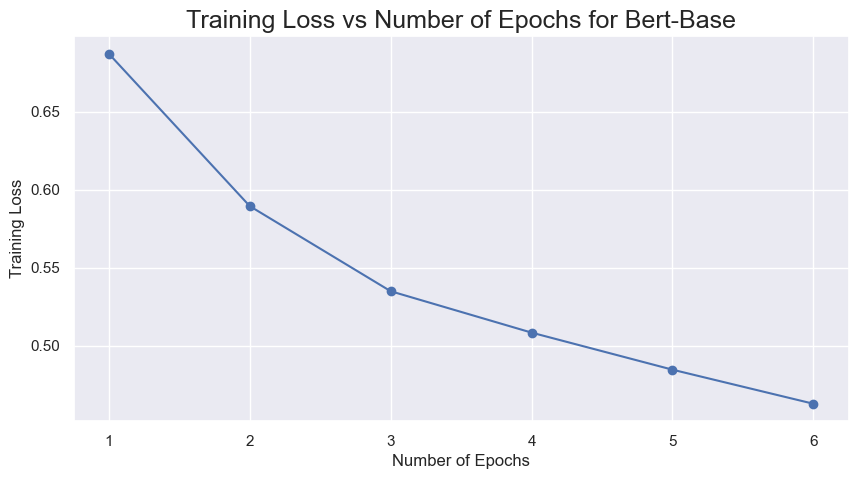

In [129]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(training_loss_list) ,'bo-',label="Train Loss")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Training Loss")
ax.set_title("Training Loss vs Number of Epochs for Bert-Base",fontsize=18)

(0.0, 100.0)

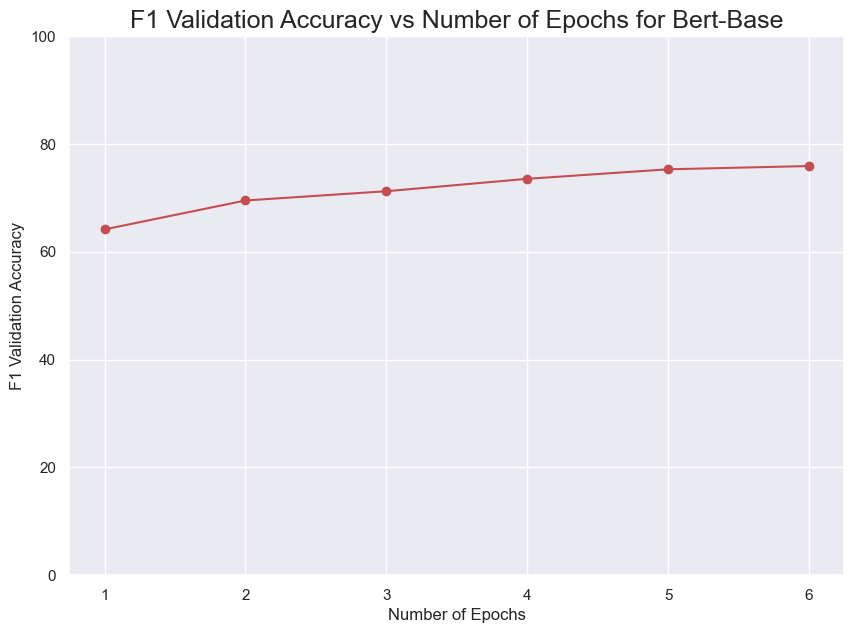

In [130]:
fig, ax = plt.subplots(figsize=(10, 7));
ax.plot(num_epochs, np.array(val_f1_accuracy_list),'ro-' ,label="F1 Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("F1 Validation Accuracy")
ax.set_title("F1 Validation Accuracy vs Number of Epochs for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

(0.0, 100.0)

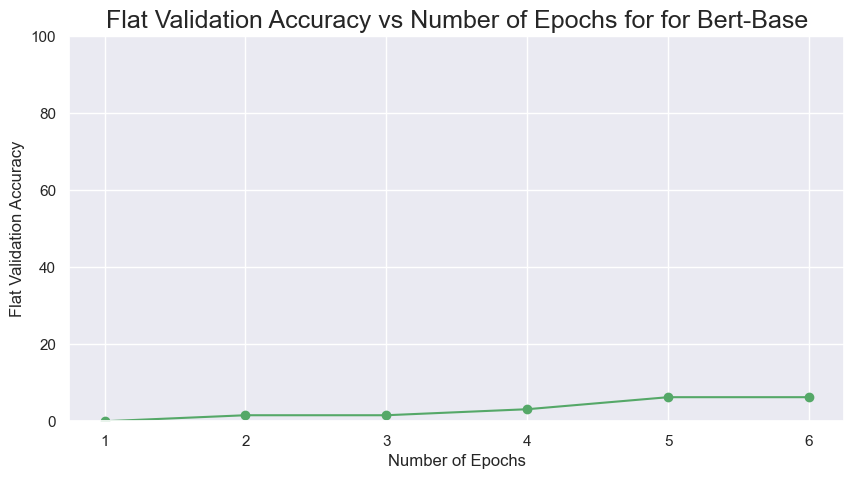

In [131]:
fig, ax = plt.subplots(figsize=(10, 5));
ax.plot(num_epochs, np.array(val_flat_accuracy_list),'go-', label="Flat Validation Accuracy")
ax.set_xlabel("Number of Epochs")
ax.set_ylabel("Flat Validation Accuracy")
ax.set_title("Flat Validation Accuracy vs Number of Epochs for for Bert-Base",fontsize=18)
ax.set_ylim(0, 100)

In [132]:
mesh_Heading_categories

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'L', 'M', 'N', 'Z']

In [133]:
df_test['one_hot_labels'] = list(df_test[mesh_Heading_categories].values)
df_test.head(3)

,Title,abstractText,meshMajor,pmid,meshid,meshroot,A,B,C,D,...,F,G,H,I,J,L,M,N,Z,one_hot_labels
1496,Determination of the required surface area of ...,A generic methodology for determining the requ...,"['Filtration', 'Models, Theoretical', 'Sewage'...",15168850,"[['E05.196.454', 'G01.280', 'G02.263'], ['E05....","['Analytical, Diagnostic and Therapeutic Techn...",0,0,0,1,...,0,1,0,0,0,0,0,1,0,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0]"
270,Renin-angiotensin-aldosterone system in nephro...,Previous studies on the renin-angiotensin-aldo...,"['Adolescent', 'Adult', 'Aldosterone', 'Blood ...",6377881,"[['M01.060.057'], ['M01.060.116'], ['D04.210.5...","['Named Groups [M]', 'Chemicals and Drugs [D]'...",0,1,1,1,...,0,1,0,0,0,0,1,0,0,"[0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0]"
611,Congenital cytomegalovirus virus infection.,A 14 months old male child with psychomotor re...,"['Brain', 'Calcinosis', 'Cytomegalovirus Infec...",20071849,"[['A08.186.211'], ['C18.452.174.130'], ['C01.9...","['Anatomy [A]', 'Diseases [C]', 'Organisms [B]...",1,1,1,0,...,1,1,0,0,0,0,1,1,0,"[1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0]"


In [134]:
test_labels = list(df_test.one_hot_labels.values)

In [135]:
Articles_test = list(df_test.abstractText.values)

In [136]:
test_mesh_categories = list(df_test.columns[6:20])

In [137]:
test_encodings = tokenizer.batch_encode_plus(Articles_test,max_length=max_length,padding=True,truncation=True)

In [138]:
test_input_ids = test_encodings['input_ids']

In [139]:
test_attention_masks = test_encodings['attention_mask']

In [140]:
test_inputs = torch.tensor(test_input_ids)

In [141]:
test_labels = torch.tensor(test_labels)

In [142]:
test_masks = torch.tensor(test_attention_masks)

In [143]:
test_data = TensorDataset(test_inputs, test_masks, test_labels,)

In [144]:
test_sampler = SequentialSampler(test_data)

In [145]:
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)

In [146]:
torch.save(test_dataloader,'test_data_loader')

In [147]:
model.eval()
logit_preds,true_labels,pred_labels,tokenized_texts = [],[],[],[]

In [148]:
%%time
for i, batch in enumerate(test_dataloader):
    batch = tuple(t.to(device) for t in batch)
    b_input_ids, b_input_mask, b_labels, = batch
    with torch.no_grad():
        outs = model(b_input_ids, token_type_ids=None, attention_mask=b_input_mask)
        b_logit_pred = outs[0]
        pred_label = torch.sigmoid(b_logit_pred)

        b_logit_pred = b_logit_pred.detach().cpu().numpy()
        pred_label = pred_label.to('cpu').numpy()
        b_labels = b_labels.to('cpu').numpy()

    tokenized_texts.append(b_input_ids)
    logit_preds.append(b_logit_pred)
    true_labels.append(b_labels)
    pred_labels.append(pred_label)

Wall time: 1min 22s


In [149]:
tokenized_texts = [item for sublist in tokenized_texts for item in sublist]

In [150]:
pred_labels = [item for sublist in pred_labels for item in sublist]

In [151]:
true_labels = [item for sublist in true_labels for item in sublist]

In [152]:
true_bools = [tl==1 for tl in true_labels]

In [153]:
pred_bools = [pl>0.50 for pl in pred_labels]

In [154]:
Test_F1_Accuracy=f1_score(true_bools, pred_bools,average='micro')

In [155]:
Test_Flat_Accuracy= accuracy_score(true_bools, pred_bools)

In [156]:
print('Test F1 Accuracy: ',Test_F1_Accuracy )
print('Test Flat Accuracy: ',Test_Flat_Accuracy,'\n')

Test F1 Accuracy:  0.7838745800671892
Test Flat Accuracy:  0.1075 



In [157]:
df_test=pd.DataFrame({'Test F1 Accuracy':Test_F1_Accuracy, 'Test Flat Accuracy':Test_Flat_Accuracy},index=[0])

In [158]:
print(classification_report(true_bools,pred_bools,target_names=test_mesh_categories))

              precision    recall  f1-score   support

           A       0.75      0.68      0.71       197
           B       0.95      1.00      0.98       381
           C       0.85      0.76      0.80       215
           D       0.88      0.82      0.85       268
           E       0.78      1.00      0.88       312
           F       1.00      0.07      0.13        71
           G       0.70      0.97      0.81       264
           H       0.00      0.00      0.00        49
           I       0.00      0.00      0.00        40
           J       0.00      0.00      0.00        39
           L       0.00      0.00      0.00        62
           M       0.79      0.82      0.80       169
           N       0.79      0.72      0.76       193
           Z       0.00      0.00      0.00        61

   micro avg       0.82      0.75      0.78      2321
   macro avg       0.54      0.49      0.48      2321
weighted avg       0.74      0.75      0.73      2321
 samples avg       0.82   

In [159]:
clf_report = classification_report(true_bools,pred_bools,target_names=test_mesh_categories,output_dict=True)

In [160]:
df_report=pd.DataFrame(clf_report).transpose()

In [161]:
df_report.to_csv('Classification_Report.csv',index=False)

In [162]:
model.save_pretrained('./BioMedical_Classification_Save/')
tokenizer.save_pretrained('./BioMedical_Classification_Save/')

('./BioMedical_Classification_Save/tokenizer_config.json',
 './BioMedical_Classification_Save/special_tokens_map.json',
 './BioMedical_Classification_Save/vocab.txt',
 './BioMedical_Classification_Save/added_tokens.json')

In [163]:
model.config.label2id= {
"Anatomy [A]": 0,
"Organisms [B]": 1,
"Diseases [C]": 2,
"Chemicals and Drugs [D]": 3,
"Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]": 4,
"Psychiatry and Psychology [F]": 5,
"Phenomena and Processes [G]": 6,
"Disciplines and Occupations [H]": 7,
"Anthropology, Education, Sociology, and Social Phenomena [I]": 8,
"Technology, Industry, and Agriculture [J]": 9,
"Information Science [L]": 10,
"Named Groups [M]": 11,
"Health Care [N]": 12,
"Geographicals [Z]": 13,
}


In [164]:
model.config.id2label={
    "0": "Anatomy [A]",
    "1": "Organisms [B]",
    "2": "Diseases [C]",
    "3": "Chemicals and Drugs [D]",
    "4": "Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]",
    "5": "Psychiatry and Psychology [F]",
    "6": "Phenomena and Processes [G]",
    "7": "Disciplines and Occupations [H]",
    "8": "Anthropology, Education, Sociology, and Social Phenomena [I]",
    "9": "Technology, Industry, and Agriculture [J]",
    "10": "Information Science [L]",
    "11": "Named Groups [M]",
    "12": "Health Care [N]",
    "13": "Geographicals [Z]"
}
    

In [165]:
import gradio as gr

In [166]:
def predict(model_input: str) -> Dict[str, float]:
    dict_custom={}
    Preprocess_part1=model_input[:len(model_input)]
    Preprocess_part2=model_input[len(model_input):]
    dict1=tokenizer.encode_plus(Preprocess_part1,max_length=1024,padding=True,truncation=True)
    dict2=tokenizer.encode_plus(Preprocess_part2,max_length=1024,padding=True,truncation=True)
    
    dict_custom['input_ids']=[dict1['input_ids'],dict1['input_ids']]
    dict_custom['token_type_ids']=[dict1['token_type_ids'],dict1['token_type_ids']]
    dict_custom['attention_mask']=[dict1['attention_mask'],dict1['attention_mask']]
    
    outs = model(torch.tensor(dict_custom['input_ids']), token_type_ids=None, attention_mask=torch.tensor(dict_custom['attention_mask']))
    b_logit_pred = outs[0]
    pred_label = torch.sigmoid(b_logit_pred)
    
    ret ={
        "Anatomy [A]": float(pred_label[0][0]),
        "Organisms [B]": float(pred_label[0][1]),
        "Diseases [C]": float(pred_label[0][2]),
        "Chemicals and Drugs [D]": float(pred_label[0][3]),
        "Analytical, Diagnostic and Therapeutic Techniques, and Equipment [E]": float(pred_label[0][4]),
        "Psychiatry and Psychology [F]": float(pred_label[0][5]),
        "Phenomena and Processes [G]": float(pred_label[0][6]),
        "Disciplines and Occupations [H]": float(pred_label[0][7]),
        "Anthropology, Education, Sociology, and Social Phenomena [I]": float(pred_label[0][8]),
        "Technology, Industry, and Agriculture [J]": float(pred_label[0][9]),
        "Information Science [L]": float(pred_label[0][10]),
        "Named Groups [M]": float(pred_label[0][11]),
        "Health Care [N]": float(pred_label[0][12]),
        "Geographicals [Z]": float(pred_label[0][13])}
    return ret











In [167]:
model_input = gr.Textbox("", show_label=False)

In [168]:
model_output = gr.Label("Result", num_top_classes=6, show_label=True, label="Labels assigned to this article")

In [169]:
title = "Pubmed Articles"


In [170]:
#Sample Data 1
#Fifty-four paraffin embedded tissue sections from patients with dysplasia (21 cases) and with cervical cancer (33 cases) were analysed. HPV was detected and identified in two stages. Firstly, using mixed starters, chosen genomic DNA sequences were amplified; secondly the material thus obtained was analyzed by hybridization method using oligonucleotyde 31-P labelled probe. HPVs of type 6, 11, 16, 18, 33 were identified. The p-53 expression was assayed by immunohistochemical method. HPV infection was often associated with dysplasia and cervical cancer. In cervical cancer mainly HPV 16 and 18 with high oncogenic potential were found. The p-53 was present rarely, and in minute quantities. No correlation was observed between presence of p-53 and HPVs DNA.
#The influence of genetic variation in alcohol dehydrogenase (ADH; EC 1.1.1.1) and aldehyde dehydrogenase (ALDH; EC 1.2.1.3) on the metabolic pattern of serotonin (5-hydroxytryptamine, 5-HT) in humans was examined from the relative urinary concentrations of the end products 5-hydroxyindole-3-acetic acid (5-HIAA) and 5-hydroxytryptophol (5-HTOL). Healthy Caucasian (Swedish) and Oriental (Chinese) subjects were genotyped for ADH2, ADH3 and ALDH2 by a PCR/SSCP technique. The 5-HTOL/5-HIAA ratios ranged between 0.9-9.4 pmol/nmol (4.4 +/- 1.8, mean +/- SD, n = 143). No significant difference in the 5-HT metabolic pattern was observed between Caucasians and Orientals (4.3 +/- 1.8 and 4.4 +/- 1.8 pmol/nmol, respectively), nor between any of the ADH2, ADH3 and ALDH2 genotypes. Despite the modulatory effects of genetic variation of these enzymes on ethanol metabolism, the present results indicate that the individual isozyme composition of ADH2, ADH3 and ALDH2 is not important for the metabolic pattern of 5-HT.

In [171]:
app = gr.Interface(
    predict, 
    inputs=model_input,
    outputs=model_output, 
    title=title,
    allow_flagging='never',
    analytics_enabled=False,
)


app.launch(inline=True,share=True)

Running on local URL:  http://127.0.0.1:7860
Running on public URL: https://1fbba8a3795629c5e7.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
